## 목표
- fashion 데이터(이미지)를 활용한 다중 분류 딥러닝 모델 구현

### 데이터 불러오기
- keras에서 제공하는 fashion_mnist 데이터 사용

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

> 훈련 데이터 샘플 출력해보기
- X데이터, y데이터 출력

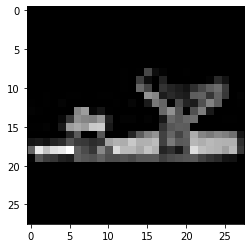

In [ ]:
plt.imshow(X_train[59999], cmap='gray')

In [ ]:
y_train[59999]

5

> 다중 분류를 위해 정답 데이터 원핫인코딩 하기
- 10개의 클래스 존재

In [ ]:
y_train_onehot = pd.get_dummies(y_train)
y_test_onehot = pd.get_dummies(y_test)

In [ ]:
y_train_onehot.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


### 모델링

#### 1. 모델 설계

In [ ]:
model1 = Sequential()

model1.add(InputLayer(input_shape=(28, 28)))
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(10, activation='softmax'))

### 2. 모델 컴파일

In [ ]:
model1.compile(loss="categorical_crossentropy",
               optimizer='adam',
               metrics=['accuracy']
               )

### 3. 모델 학습
- batch_size : 한번에 데이터를 학습시키는 최소 단위 (디폴트 값은 32)

In [ ]:
history1 = model1.fit(X_train, y_train_onehot, epochs=50, validation_split=0.2, batch_size=128)

Epoch 1/50
375/375 [==============================] - 2s 4ms/step - loss: 1.8085 - accuracy: 0.6742 - val_loss: 0.6583 - val_accuracy: 0.7642
Epoch 2/50
375/375 [==============================] - 1s 3ms/step - loss: 0.5644 - accuracy: 0.7996 - val_loss: 0.5193 - val_accuracy: 0.8141
Epoch 3/50
375/375 [==============================] - 1s 3ms/step - loss: 0.4839 - accuracy: 0.8284 - val_loss: 0.4782 - val_accuracy: 0.8296
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 0.4392 - accuracy: 0.8426 - val_loss: 0.4624 - val_accuracy: 0.8344
Epoch 5/50
375/375 [==============================] - 1s 3ms/step - loss: 0.4174 - accuracy: 0.8486 - val_loss: 0.4568 - val_accuracy: 0.8409
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3866 - accuracy: 0.8589 - val_loss: 0.4149 - val_accuracy: 0.8516
Epoch 7/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3749 - accuracy: 0.8620 - val_loss: 0.4103 - val_accuracy: 0.8524
Epoch 

>학습 현황 시각화

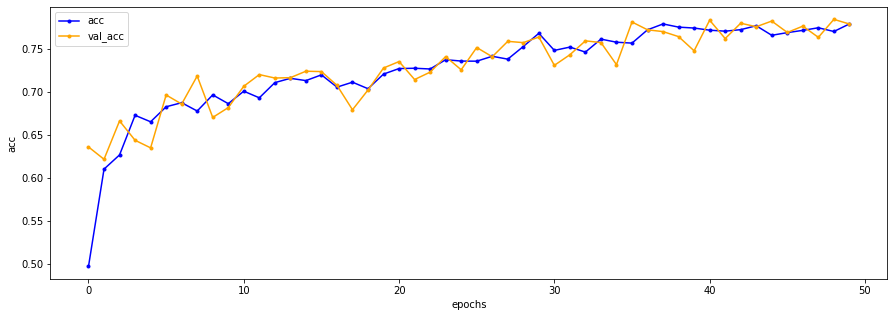

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(history1.history['accuracy'], label='acc', c='blue', marker='.')
plt.plot(history1.history['val_accuracy'], label='val_acc', c='orange', marker='.')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

### 4. 모델 평가

In [ ]:
model1.evaluate(X_test, y_test_onehot)

313/313 [==============================] - 1s 2ms/step - loss: 0.4579 - accuracy: 0.8724


[0.4579177796840668, 0.8723999857902527]

### 결론

- 손글씨 데이터에 비해 결과가 비교적으로 낮게 나옴을 확인할 수 있다.
- fashion 이미지 데이터가 손글씨보다 많은 정보(픽셀값)들이 담겨져 있었고, 사람의 눈으로 보기에도 쉽게 분류되지 않은 이미지들도 존재했다.
- 입력 데이터에 더 많은 전처리와 튜닝이 필요하다고 판단할 수 있다.